In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [2]:
df = pd.read_csv('dataset.csv')
df = df.drop_duplicates()
df

,String,BWT_string
0,OTITBO,OTTB$IO
1,BNIUMP,P$NUBMI
2,AKSFAQZU,U$FSAAKZQ
3,GEDAKX,XDEG$AK
4,BJFVWZA,AZ$JBFVW
...,...,...
99995,PZEKZJA,AJZZE$PK
99996,EWWWRCLH,HR$LCWWWE
99997,ZSDPDT,TSPDZD$
99998,ZBRBBVIE,ERZBIVBB$


In [3]:
X = df['String']
y = df['BWT_string']

In [14]:
vocab_size = 10000
encoded_X = [ one_hot(d, vocab_size) for d in X]
encoded_y = [ one_hot(d, vocab_size) for d in y]
encoded_X

[[3050],
 [2841],
 [9143],
 [2055],
 [1740],
 [9602],
 [4220],
 [1263],
 [2197],
 [8511],
 [861],
 [8513],
 [1072],
 [9307],
 [3032],
 [3748],
 [7118],
 [19],
 [2116],
 [3768],
 [2698],
 [1850],
 [9768],
 [7185],
 [715],
 [5028],
 [2730],
 [1432],
 [9109],
 [8086],
 [9663],
 [4128],
 [7446],
 [9372],
 [5079],
 [5607],
 [3377],
 [8531],
 [3234],
 [4623],
 [6387],
 [3950],
 [1436],
 [6278],
 [1153],
 [7225],
 [2990],
 [6865],
 [6801],
 [7526],
 [9050],
 [7594],
 [4147],
 [58],
 [8801],
 [5845],
 [9681],
 [4396],
 [8078],
 [4764],
 [7222],
 [1427],
 [5862],
 [5169],
 [4779],
 [3914],
 [3022],
 [1738],
 [7221],
 [7962],
 [9913],
 [4086],
 [2554],
 [472],
 [565],
 [5838],
 [6990],
 [6341],
 [1958],
 [8661],
 [2785],
 [3045],
 [299],
 [8967],
 [7974],
 [102],
 [2876],
 [6126],
 [6541],
 [7928],
 [8880],
 [8181],
 [1912],
 [2550],
 [9267],
 [3876],
 [4674],
 [7531],
 [3532],
 [455],
 [3059],
 [9344],
 [7810],
 [1177],
 [7416],
 [7743],
 [4315],
 [2626],
 [5866],
 [5884],
 [6737],
 [5034],
 [8

In [5]:
len(encoded_y)

99998

In [15]:
embedding_length = 5
max_len = 5
padded_X = pad_sequences(encoded_X, truncating='post', padding='post', maxlen=max_len)
padded_y = pad_sequences(encoded_y, truncating='post', padding='post', maxlen=max_len)
padded_X

array([[3050,    0,    0,    0,    0],
       [2841,    0,    0,    0,    0],
       [9143,    0,    0,    0,    0],
       ...,
       [4352,    0,    0,    0,    0],
       [7181,    0,    0,    0,    0],
       [1380,    0,    0,    0,    0]])

In [7]:
padded_y.shape

(99998, 5)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(padded_X, padded_y, test_size = 0.2, random_state =4)

In [9]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_length, input_length=max_len))

model.add(LSTM((1000),batch_input_shape=(1000, None, 5), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.2))

#model.add(LSTM((5), activation='softmax', return_sequences=False))
#Adding the output layer
model.add(Dense(5, activation='softmax'))

model.compile(loss='mean_absolute_error',
#              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#output = model.predict(X_train)
#print(output.shape)
#print(output)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 5)              50000     
                                                                 
 lstm (LSTM)                 (None, 5, 1000)           4024000   
                                                                 
 dropout (Dropout)           (None, 5, 1000)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               440400    
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5

In [10]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test,y_test))

Epoch 1/3
2500/2500 [==============================] - 297s 117ms/step - loss: 1852.3184 - accuracy: 0.5811 - val_loss: 1842.1392 - val_accuracy: 0.5824
Epoch 2/3
2500/2500 [==============================] - 288s 115ms/step - loss: 1852.3169 - accuracy: 0.5835 - val_loss: 1842.1392 - val_accuracy: 0.5824
Epoch 3/3
2500/2500 [==============================] - 293s 117ms/step - loss: 1852.3162 - accuracy: 0.5835 - val_loss: 1842.1392 - val_accuracy: 0.5824


In [11]:
results = model.predict(X_test)
results

625/625 [==============================] - 16s 24ms/step


array([[1.00000000e+00, 1.05263303e-18, 2.04966854e-15, 2.28037882e-21,
        1.52075504e-33],
       [1.00000000e+00, 1.05767645e-18, 2.05756500e-15, 2.29282611e-21,
        1.53401609e-33],
       [1.00000000e+00, 1.05817690e-18, 2.05834999e-15, 2.29405962e-21,
        1.53531574e-33],
       ...,
       [1.00000000e+00, 1.05465476e-18, 2.05282966e-15, 2.28536008e-21,
        1.52606662e-33],
       [1.00000000e+00, 1.05366556e-18, 2.05129548e-15, 2.28292903e-21,
        1.52347245e-33],
       [1.00000000e+00, 1.06537027e-18, 2.06960917e-15, 2.31184057e-21,
        1.55433836e-33]], dtype=float32)

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

625/625 [==============================] - 17s 26ms/step - loss: 1842.1392 - accuracy: 0.5824
Test Loss: 1842.13916015625
Test Accuracy: 0.5823500156402588


<function matplotlib.pyplot.show(close=None, block=None)>

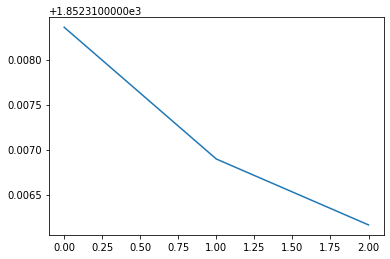

In [13]:
plt.plot(history.history['loss'])
plt.show